In [21]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resources/Video_Performance_Over_Time.csv")
df

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111852,21 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,2,0,0,0,0,0,0.693108,215.556500,0
111853,20 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,9,0,0,0,0,0,0.492501,153.167667,0
111854,19 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,4,0,0,0,0,0,0.087268,27.140250,0
111855,18 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,13,0,0,0,0,0,0.444176,138.138769,0


In [3]:
df.dropna(axis = 0)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111852,21 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,2,0,0,0,0,0,0.693108,215.556500,0
111853,20 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,9,0,0,0,0,0,0.492501,153.167667,0
111854,19 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,4,0,0,0,0,0,0.087268,27.140250,0
111855,18 Nov 2017,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,13,0,0,0,0,0,0.444176,138.138769,0


In [4]:
df.isna().sum()

Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64

In [5]:
df.columns

Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Subscriptions Added',
       'User Subscriptions Removed', 'Average View Percentage',
       'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [6]:
df.drop(['Date', 'Video Title', 'External Video ID','Thumbnail link', 'Average View Percentage',
       'Average Watch Time'], axis = 1, inplace = True)

In [7]:
y = df["Views"]

In [8]:
X = df.drop("Views", axis = 1)

In [9]:
X

,Video Length,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,User Comments Added
0,2191,0,0,0,0,0,0
1,51,0,0,0,1,0,0
2,2686,0,0,0,0,0,0
3,980,0,0,0,0,0,0
4,2904,0,0,0,0,0,0
...,...,...,...,...,...,...,...
111852,311,0,0,0,0,0,0
111853,311,0,0,0,0,0,0
111854,311,0,0,0,0,0,0
111855,311,0,0,0,0,0,0


In [10]:
df.mean()

Video Length                  874.615876
Views                          49.714287
Video Likes Added               2.095533
Video Dislikes Added            0.052424
Video Likes Removed             0.086789
User Subscriptions Added        1.169180
User Subscriptions Removed      0.026391
User Comments Added             0.000000
dtype: float64

In [11]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# find number of columns to find the input dimension
len(X.columns)

7

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = Sequential()

# First hidden layer
nn.add(Dense(units=15, activation="relu", input_dim=7))

# Second hidden layer
nn.add(Dense(units=15, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation='relu'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                120       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 376 (1.47 KB)
Trainable params: 376 (1.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2622/2622 [==============================] - 5s 1ms/step - loss: 96309.0234 - accuracy: 0.1173
Epoch 2/100
2622/2622 [==============================] - 4s 1ms/step - loss: 62252.1758 - accuracy: 0.1226
Epoch 3/100
2622/2622 [==============================] - 4s 1ms/step - loss: 23582.8184 - accuracy: 0.1226
Epoch 4/100
2622/2622 [==============================] - 4s 1ms/step - loss: 13857.3027 - accuracy: 0.1226
Epoch 5/100
2622/2622 [==============================] - 4s 1ms/step - loss: 10833.0820 - accuracy: 0.1226
Epoch 6/100
2622/2622 [==============================] - 4s 1ms/step - loss: 9468.1543 - accuracy: 0.1226
Epoch 7/100
2622/2622 [==============================] - 4s 1ms/step - loss: 8386.8203 - accuracy: 0.1226
Epoch 8/100
2622/2622 [==============================] - 4s 1ms/step - loss: 7957.7153 - accuracy: 0.1226
Epoch 9/100
2622/2622 [==============================] - 4s 2ms/step - loss: 7683.3208 - accuracy: 0.1226
Epoch 10/100
2622/2622 [=================

2622/2622 [==============================] - 4s 1ms/step - loss: 4766.1299 - accuracy: 0.1166
Epoch 78/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4680.8442 - accuracy: 0.1160
Epoch 79/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4838.9688 - accuracy: 0.1128
Epoch 80/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4674.7632 - accuracy: 0.1164
Epoch 81/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4509.0176 - accuracy: 0.1147
Epoch 82/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4606.3364 - accuracy: 0.1161
Epoch 83/100
2622/2622 [==============================] - 4s 1ms/step - loss: 4595.6919 - accuracy: 0.1112
Epoch 84/100
2622/2622 [==============================] - 4s 2ms/step - loss: 4571.1265 - accuracy: 0.1178
Epoch 85/100
2622/2622 [==============================] - 4s 2ms/step - loss: 4873.0127 - accuracy: 0.1137
Epoch 86/100
2622/2622 [==========================

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

874/874 - 1s - loss: 4739.8599 - accuracy: 0.1251 - 1s/epoch - 1ms/step
Loss: 4739.85986328125, Accuracy: 0.12508492171764374


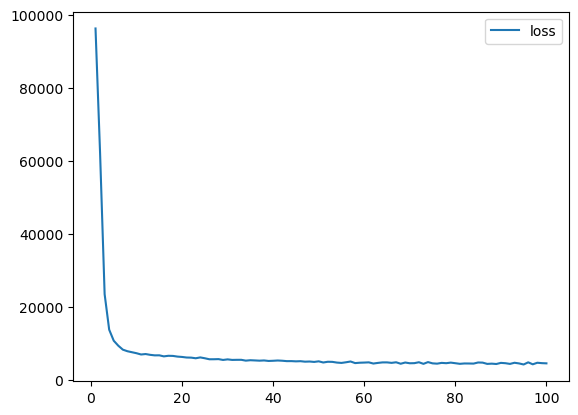

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
plt.show()